In [32]:
# I added the necessary libraries in Python.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [33]:
# Data was read and printed
data = pd.read_excel("dataset.xlsx")
data

,Name,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
0,Alarmio-master,22,17,3,169,1.4,1.0,0.364583,2.000000,5.802083,27.260802,3.567901,3.427686,4.367769,21.252630,5.464506,1.968750
1,AndroidAsyncHTTP-master,11,20,14,494,4.7,6.0,0.474684,2.208861,24.006329,25.996479,10.336268,3.172492,2.727170,17.430380,5.158451,2.177215
2,android-pdf-viewer-master,2,1,0,4,0.0,12.2,0.000000,0.500000,1.833333,18.280000,4.560000,1.727273,3.454545,9.666667,2.560000,1.666667
3,android-permission-handler-master,1,1,1,6,0.0,2.1,0.083333,1.000000,4.250000,18.757143,3.385714,3.019608,2.333333,8.833333,3.314286,1.666667
4,Android-WhatsApp-master,0,6,0,253,3.4,4.2,0.036145,2.843373,2.120482,46.416898,16.549861,7.336918,5.704301,10.913580,11.076696,0.903614
5,android-youtubeExtractor-master,4,18,7,100,3.8,3.1,0.200000,1.880000,6.720000,43.434783,2.920290,3.908163,5.020408,18.826090,8.260870,1.840000
6,androidtv-sample-inputs-master,15,3,0,155,3.0,1.0,0.241935,2.491935,8.120968,36.534765,11.452965,3.972868,4.281654,23.250000,5.811861,1.580645
7,BirthdayBuddy-master,1,0,0,69,1.0,0.2,0.000000,0.000000,0.000000,52.708333,1.708333,0.000000,0.000000,0.000000,0.000000,0.000000
8,dex2jar,34,306,43,2000,10.1,1.7,0.500824,3.654036,7.975288,41.952099,5.579882,5.454865,4.075811,17.238180,9.152676,1.507414
9,epubator-master,0,12,8,134,0.0,3.0,0.255319,2.180851,6.063830,19.005579,2.112971,2.749027,3.050584,16.319150,3.418410,1.127660


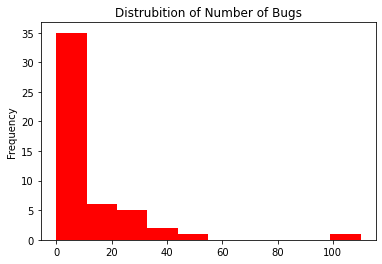

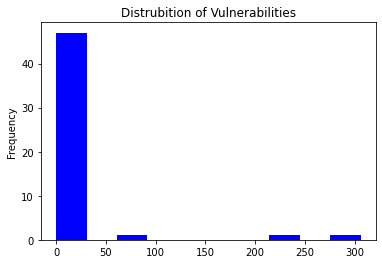

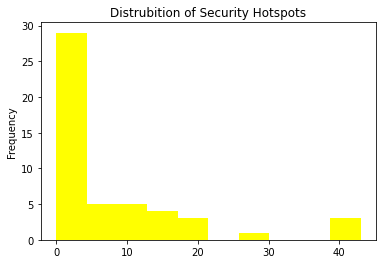

In [34]:
# I showed the distribution of 3 metrics that can be evidence for choosing appropriate correlation analysis type 
# (Spearman or Pearson)

plt.hist(data["NOB"],color = "red")
plt.title("Distrubition of Number of Bugs")
plt.ylabel("Frequency")
plt.show()
plt.hist(data["V"],color = "blue")
plt.title("Distrubition of Vulnerabilities")
plt.ylabel("Frequency")
plt.show()
plt.hist(data["SH"],color = "yellow")
plt.ylabel("Frequency")
plt.title("Distrubition of Security Hotspots")
plt.show()

In [35]:
# Minmax normalization of all data.
df = data.copy()
df = df.drop("Name",axis = 1)
df[["NOB","V","SH","CS","CDR","TD","NOC","CBO","RFC","LOC","CLOC","FanIn","FanOut","LCOM","WMC","DIT"]] = MinMaxScaler().fit_transform(df[["NOB","V","SH","CS","CDR","TD","NOC","CBO","RFC","LOC","CLOC","FanIn","FanOut","LCOM","WMC","DIT"]])
df

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
0,0.200000,0.055556,0.069767,0.0845,0.070707,0.081967,0.450368,0.547340,0.241690,0.328644,0.215585,0.467183,0.678344,0.483014,0.493334,0.904251
1,0.100000,0.065359,0.325581,0.2470,0.237374,0.491803,0.586374,0.604499,1.000000,0.295288,0.624553,0.432401,0.423548,0.396145,0.465703,1.000000
2,0.018182,0.003268,0.000000,0.0020,0.000000,1.000000,0.000000,0.136835,0.076369,0.091712,0.275531,0.235422,0.536514,0.219697,0.231116,0.765504
3,0.009091,0.003268,0.023256,0.0030,0.000000,0.172131,0.102941,0.273670,0.177037,0.104300,0.204577,0.411564,0.362383,0.200758,0.299212,0.765504
4,0.000000,0.019608,0.000000,0.1265,0.171717,0.344262,0.044649,0.778146,0.088330,0.834019,1.000000,1.000000,0.885917,0.248036,1.000000,0.415032
5,0.036364,0.058824,0.162791,0.0500,0.191919,0.254098,0.247059,0.514500,0.279926,0.755345,0.176454,0.532671,0.779704,0.427866,0.745788,0.845116
6,0.136364,0.009804,0.000000,0.0775,0.151515,0.081967,0.298861,0.681968,0.338284,0.573309,0.692028,0.541490,0.664970,0.528409,0.524693,0.725994
7,0.009091,0.000000,0.000000,0.0345,0.050505,0.016393,0.000000,0.000000,0.000000,1.000000,0.103223,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.309091,1.000000,1.000000,1.0000,0.510101,0.139344,0.618665,1.000000,0.332216,0.716229,0.337156,0.743482,0.633001,0.391777,0.826300,0.692359
9,0.000000,0.039216,0.186047,0.0670,0.000000,0.245902,0.315394,0.596833,0.252593,0.110854,0.127673,0.374684,0.473776,0.370890,0.308613,0.517937


In [36]:
# Correlation of all metrics.
data.corr(method = "spearman")

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
NOB,1.000000,0.694733,0.587592,0.691274,0.373251,0.133383,0.407858,0.353351,0.447180,0.349883,0.369028,0.458483,0.277107,0.062748,0.507420,0.245963
V,0.694733,1.000000,0.629663,0.624194,0.280358,0.296757,0.409002,0.426221,0.345986,0.243636,0.208594,0.468565,0.289585,0.029765,0.397770,0.110767
SH,0.587592,0.629663,1.000000,0.618509,0.384657,-0.026546,0.512876,0.391886,0.425499,0.129174,0.204069,0.278723,0.156120,-0.016116,0.349367,0.107688
CS,0.691274,0.624194,0.618509,1.000000,0.548113,0.194611,0.402859,0.577439,0.492868,0.440458,0.260596,0.456943,0.388502,0.065511,0.569857,0.218801
CDR,0.373251,0.280358,0.384657,0.548113,1.000000,0.013400,0.192707,0.212007,0.240992,0.328527,0.171773,0.243709,0.237237,-0.038683,0.343628,0.123330
TD,0.133383,0.296757,-0.026546,0.194611,0.013400,1.000000,-0.179659,0.013652,-0.126364,-0.031098,0.114297,0.239077,0.240135,0.017159,0.127638,0.352010
NOC,0.407858,0.409002,0.512876,0.402859,0.192707,-0.179659,1.000000,0.667344,0.584086,-0.120165,0.297347,0.268289,-0.074350,-0.013518,0.173468,-0.163788
CBO,0.353351,0.426221,0.391886,0.577439,0.212007,0.013652,0.667344,1.000000,0.421247,0.177024,0.250408,0.594578,0.240953,0.109694,0.492616,0.000144
RFC,0.447180,0.345986,0.425499,0.492868,0.240992,-0.126364,0.584086,0.421247,1.000000,0.134608,0.381636,0.414878,0.072564,0.444076,0.529367,0.237368
LOC,0.349883,0.243636,0.129174,0.440458,0.328527,-0.031098,-0.120165,0.177024,0.134608,1.000000,0.126681,0.554326,0.618676,-0.065455,0.678224,0.181072


In [37]:
# P values of correlation tables.
from scipy import stats
import scipy as sp
p1, p2 = sp.stats.spearmanr(df)
np.set_printoptions(suppress = True)
np.around(p2,4)

array([[0.    , 0.    , 0.    , 0.    , 0.0076, 0.3558, 0.0033, 0.0118,
        0.0011, 0.0127, 0.0084, 0.0008, 0.0514, 0.6651, 0.0002, 0.0851],
       [0.    , 0.    , 0.    , 0.    , 0.0486, 0.0364, 0.0032, 0.002 ,
        0.0138, 0.0882, 0.146 , 0.0006, 0.0414, 0.8374, 0.0042, 0.4438],
       [0.    , 0.    , 0.    , 0.    , 0.0058, 0.8548, 0.0001, 0.0049,
        0.0021, 0.3713, 0.1552, 0.05  , 0.279 , 0.9115, 0.0129, 0.4566],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.1756, 0.0037, 0.    ,
        0.0003, 0.0014, 0.0676, 0.0009, 0.0053, 0.6513, 0.    , 0.1269],
       [0.0076, 0.0486, 0.0058, 0.    , 0.    , 0.9264, 0.18  , 0.1394,
        0.0918, 0.0198, 0.233 , 0.0881, 0.0971, 0.7897, 0.0146, 0.3935],
       [0.3558, 0.0364, 0.8548, 0.1756, 0.9264, 0.    , 0.2119, 0.925 ,
        0.3819, 0.8302, 0.4293, 0.0945, 0.093 , 0.9059, 0.3771, 0.0122],
       [0.0033, 0.0032, 0.0001, 0.0037, 0.18  , 0.2119, 0.    , 0.    ,
        0.    , 0.4058, 0.036 , 0.0596, 0.6078, 0.9258, 0.

<AxesSubplot:>

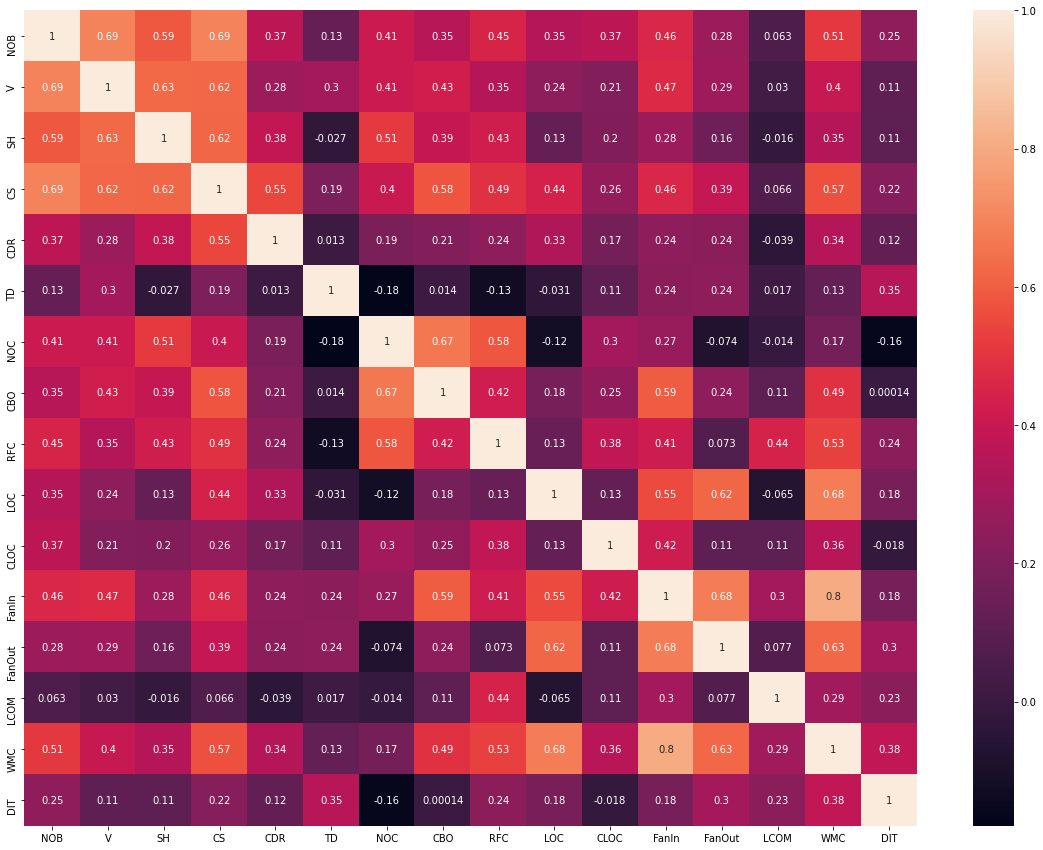

In [38]:
# Heatmap of correlation.
datacorr = data.corr(method = "spearman")
plt.figure(figsize=(20,15))
sns.heatmap(datacorr, annot=True)

In [39]:
# Correlation between external metrics and td.
data_ext_td = data.drop(["NOC","CBO","RFC","LOC","CLOC","FanIn","FanOut","LCOM","WMC","DIT"],axis = 1)
corr_ext_td = data_ext_td.corr(method = "spearman")
corr_ext_td.drop(["NOB","V","SH","CS"],axis = 1, inplace = True)
corr_ext_td.drop(["CDR","TD"],axis = 0, inplace = True)
corr_ext_td

,CDR,TD
NOB,0.373251,0.133383
V,0.280358,0.296757
SH,0.384657,-0.026546
CS,0.548113,0.194611


In [40]:
# Correlation between internal metrics and td.
data_int_td = data.drop(["NOB","V","SH","CS"],axis = 1)
corr_ext_td = data_int_td.corr(method = "spearman")
corr_ext_td.drop(["NOC","CBO","RFC","LOC","CLOC","FanIn","FanOut","LCOM","WMC","DIT"],axis = 1,inplace = True)
corr_ext_td.drop(["CDR","TD"],axis = 0, inplace = True)
corr_ext_td

,CDR,TD
NOC,0.192707,-0.179659
CBO,0.212007,0.013652
RFC,0.240992,-0.126364
LOC,0.328527,-0.031098
CLOC,0.171773,0.114297
FanIn,0.243709,0.239077
FanOut,0.237237,0.240135
LCOM,-0.038683,0.017159
WMC,0.343628,0.127638
DIT,0.123330,0.352010


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import NearestCentroid
random_fixed = 53



def plotGraph(y_test,y_pred,regressorName):
    plt.scatter(y_test, y_test,label = "Original Values",color = "red")
    plt.scatter(y_test,y_pred,label = "Predict Values",color = "blue")
    plt.title(regressorName)
    plt.legend()
    plt.show()



def linearRegression(x_train,y_train,x_test,y_test,cdr_or_td):
    lg = LinearRegression()
    lg.fit(x_train,y_train)
    ypred = lg.predict(x_test)
    if cdr_or_td == "cdr": plotGraph(y_test,ypred,"Linear Regression of CDR")
    elif cdr_or_td == "td": plotGraph(y_test,ypred,"Linear Regression of TD")

        
        
def svrRegression(x_train,y_train,x_test,y_test,cdr_or_td,method):
    if method == "RBF": svr = SVR(kernel="rbf")
    elif method == "Linear": svr = SVR(kernel= "linear")
    svr.fit(x_train,y_train)
    ypred = svr.predict(x_test)
    if cdr_or_td == "cdr": plotGraph(y_test,ypred,"SVR of CDR " + method)
    elif cdr_or_td == "td": plotGraph(y_test,ypred,"SVR of TD " + method)

        
        
def decisionTreeRegression(x_train,y_train,x_test,y_test,cdr_or_td):
    dtr = DecisionTreeRegressor(random_state = random_fixed)
    dtr.fit(x_train,y_train)
    ypred = dtr.predict(x_test)
    if cdr_or_td == "cdr": plotGraph(y_test,ypred,"Decision Tree Regression of CDR")
    elif cdr_or_td == "td": plotGraph(y_test,ypred,"Decision Tree Regression of TD")
        
def randomDecTreeRegression(x_train,y_train,x_test,y_test,cdr_or_td):
    randomdec = RandomForestRegressor(random_state = random_fixed)
    randomdec.fit(x_train,y_train)
    ypred = randomdec.predict(x_test)
    if cdr_or_td == "cdr": plotGraph(y_test,ypred,"Random Forest Tree Regression of CDR")
    elif cdr_or_td == "td": plotGraph(y_test,ypred,"Random Forest Tree Regression of TD")

        
def mlpRegressor(x_train,y_train,x_test,y_test,cdr_or_td):
    mlp = MLPRegressor(random_state = random_fixed)
    mlp.fit(x_train,y_train)
    ypred = mlp.predict(x_test)
    if cdr_or_td == "cdr": plotGraph(y_test,ypred,"MLP Regressor of CDR")
    elif cdr_or_td == "td": plotGraph(y_test,ypred,"MLP Regressor of TD")

In [42]:
# Estimating Technical Debt using Internal Metrics.
x = df.iloc[:,6:].values # Internal Metrics
y_cdr = df.iloc[:,4].values # CDR
y_td = df.iloc[:,5].values # TD

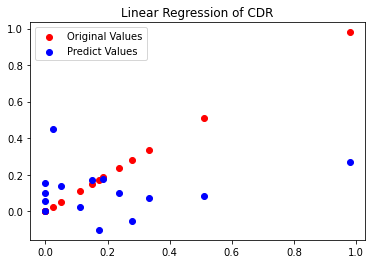

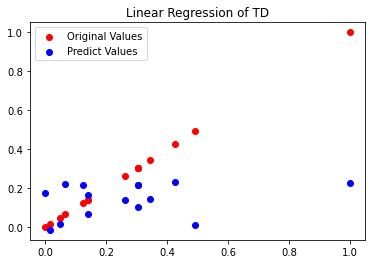

In [43]:
# Model for Linear Regression to estimate Technical Debt using Internal Metrics.
x_train, x_test, y_train, y_test = train_test_split(x,y_cdr, train_size = 0.70,random_state = random_fixed)
linearRegression(x_train,y_train,x_test,y_test,"cdr")

x_train, x_test, y_train, y_test = train_test_split(x,y_td, test_size = 0.30,random_state = random_fixed)
linearRegression(x_train,y_train,x_test,y_test,"td")

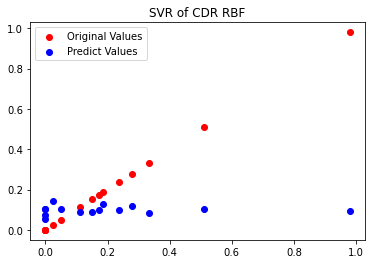

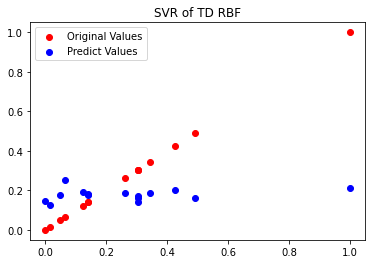

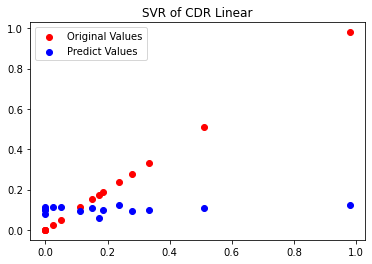

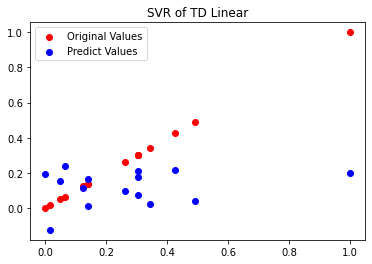

In [44]:
# Model for SVR Regression to estimate Technical Debt using Internal Metrics.
x_train, x_test, y_train, y_test = train_test_split(x,y_cdr, train_size = 0.70,random_state = random_fixed)
svrRegression(x_train,y_train,x_test,y_test,"cdr","RBF")

x_train, x_test, y_train, y_test = train_test_split(x,y_td, train_size = 0.70,random_state = random_fixed)
svrRegression(x_train,y_train,x_test,y_test,"td","RBF")

x_train, x_test, y_train, y_test = train_test_split(x,y_cdr, train_size = 0.70,random_state = random_fixed)
svrRegression(x_train,y_train,x_test,y_test,"cdr","Linear")

x_train, x_test, y_train, y_test = train_test_split(x,y_td, train_size = 0.70,random_state = random_fixed)
svrRegression(x_train,y_train,x_test,y_test,"td","Linear")

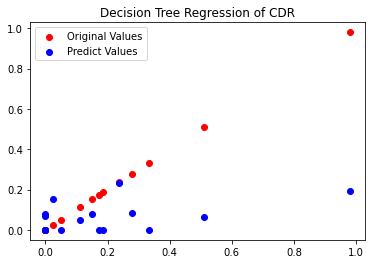

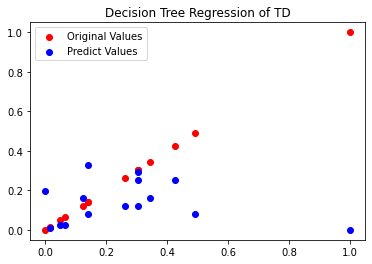

In [45]:
# Model for Decision Tree Regression to estimate Technical Debt using Internal Metrics.
x_train, x_test, y_train, y_test = train_test_split(x,y_cdr, train_size = 0.70,random_state = random_fixed)
decisionTreeRegression(x_train,y_train,x_test,y_test,"cdr")
x_train, x_test, y_train, y_test = train_test_split(x,y_td, train_size = 0.70,random_state = random_fixed)
decisionTreeRegression(x_train,y_train,x_test,y_test,"td")

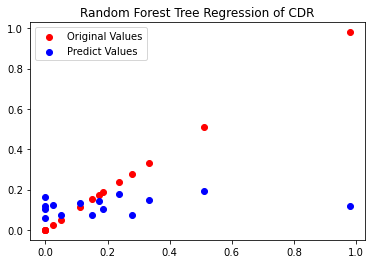

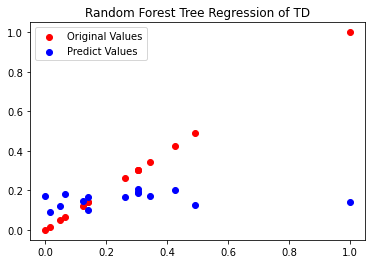

In [46]:
# Model for Random Dec. Tree Regression to estimate Technical Debt using Internal Metrics.
x_train, x_test, y_train, y_test = train_test_split(x,y_cdr, train_size = 0.70,random_state = random_fixed)
randomDecTreeRegression(x_train,y_train,x_test,y_test,"cdr")
x_train, x_test, y_train, y_test = train_test_split(x,y_td, train_size = 0.70,random_state = random_fixed)
randomDecTreeRegression(x_train,y_train,x_test,y_test,"td")

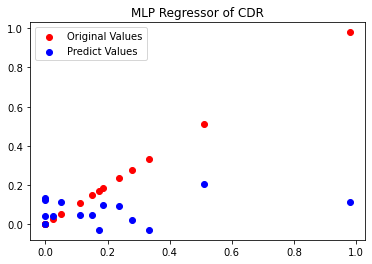

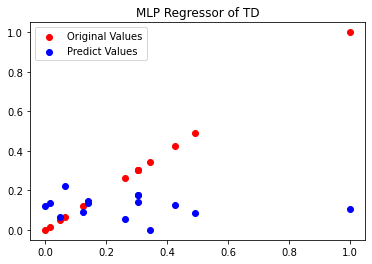

In [47]:
# Model for MLP Regressor to estimate Technical Debt using Internal Metrics.
train, x_test, y_train, y_test = train_test_split(x,y_cdr, train_size = 0.70,random_state = random_fixed)
mlpRegressor(x_train,y_train,x_test,y_test,"cdr")
x_train, x_test, y_train, y_test = train_test_split(x,y_td, train_size = 0.70,random_state = random_fixed)
mlpRegressor(x_train,y_train,x_test,y_test,"td")

In [48]:
# Estimating Technical Debt using External Metrics.
x = df.iloc[:,:4].values # External Metrics
y_cdr = df.iloc[:,4].values # CDR
y_td = df.iloc[:,5].values # TD

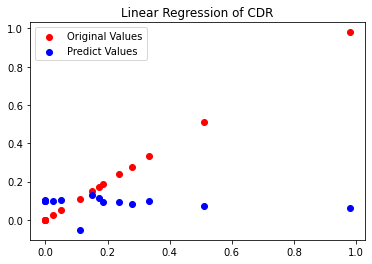

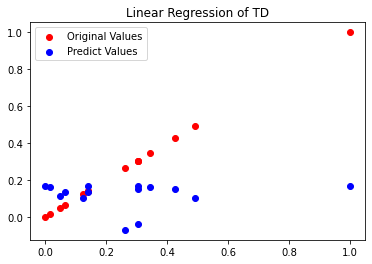

In [49]:
# Model for Linear Regression to estimate Technical Debt using External Metrics.
x_train, x_test, y_train, y_test = train_test_split(x,y_cdr, train_size = 0.70,random_state = random_fixed)
linearRegression(x_train,y_train,x_test,y_test,"cdr")

x_train, x_test, y_train, y_test = train_test_split(x,y_td, test_size = 0.30,random_state = random_fixed)
linearRegression(x_train,y_train,x_test,y_test,"td")

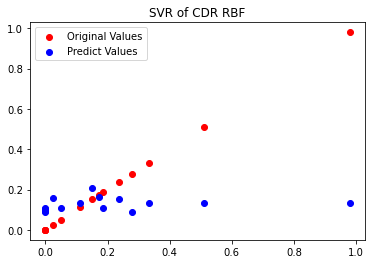

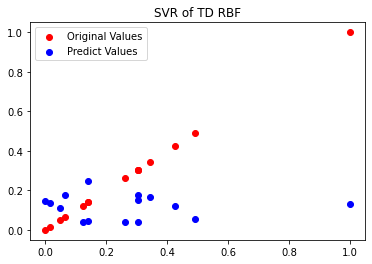

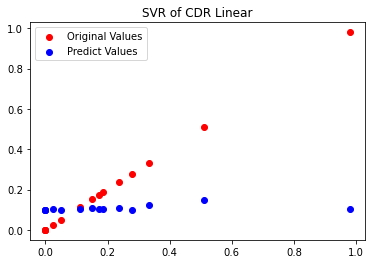

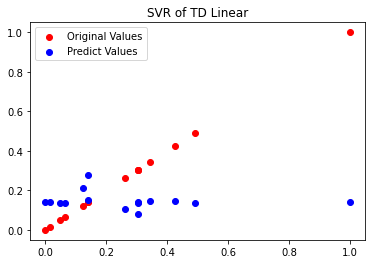

In [50]:
# Model for SVR Regression to estimate Technical Debt using External Metrics.
x_train, x_test, y_train, y_test = train_test_split(x,y_cdr, train_size = 0.70,random_state = random_fixed)
svrRegression(x_train,y_train,x_test,y_test,"cdr","RBF")

x_train, x_test, y_train, y_test = train_test_split(x,y_td, train_size = 0.70,random_state = random_fixed)
svrRegression(x_train,y_train,x_test,y_test,"td","RBF")

x_train, x_test, y_train, y_test = train_test_split(x,y_cdr, train_size = 0.70,random_state = random_fixed)
svrRegression(x_train,y_train,x_test,y_test,"cdr","Linear")

x_train, x_test, y_train, y_test = train_test_split(x,y_td, train_size = 0.70,random_state = random_fixed)
svrRegression(x_train,y_train,x_test,y_test,"td","Linear")

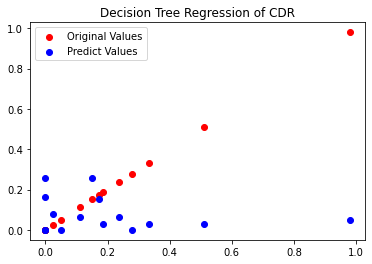

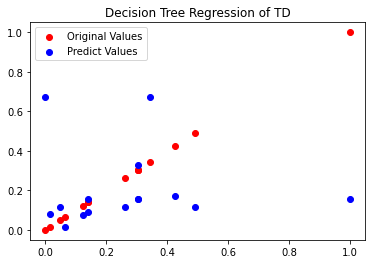

In [51]:
# Model for Decision Tree Regression to estimate Technical Debt using External Metrics.
x_train, x_test, y_train, y_test = train_test_split(x,y_cdr, train_size = 0.70,random_state = random_fixed)
decisionTreeRegression(x_train,y_train,x_test,y_test,"cdr")
x_train, x_test, y_train, y_test = train_test_split(x,y_td, train_size = 0.70,random_state = random_fixed)
decisionTreeRegression(x_train,y_train,x_test,y_test,"td")

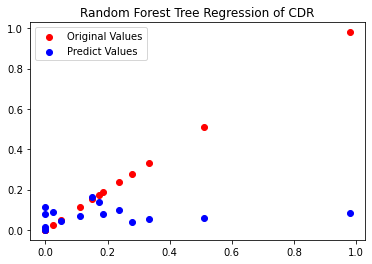

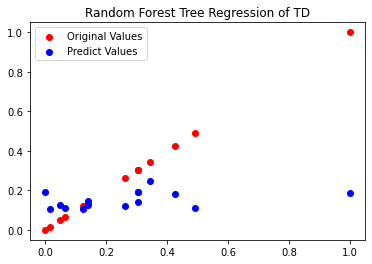

In [52]:
# Model for Random Dec. Tree Regression to estimate Technical Debt using External Metrics.
x_train, x_test, y_train, y_test = train_test_split(x,y_cdr, train_size = 0.70,random_state = random_fixed)
randomDecTreeRegression(x_train,y_train,x_test,y_test,"cdr")
x_train, x_test, y_train, y_test = train_test_split(x,y_td, train_size = 0.70,random_state = random_fixed)
randomDecTreeRegression(x_train,y_train,x_test,y_test,"td")

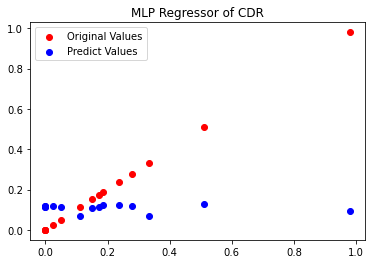

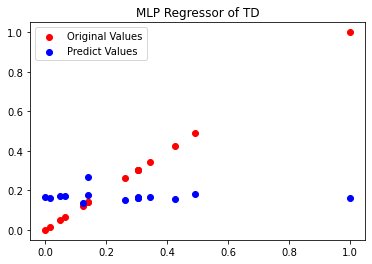

In [53]:
# Model for MLP Regressor to estimate Technical Debt using External Metrics.
train, x_test, y_train, y_test = train_test_split(x,y_cdr, train_size = 0.70,random_state = random_fixed)
mlpRegressor(x_train,y_train,x_test,y_test,"cdr")
x_train, x_test, y_train, y_test = train_test_split(x,y_td, train_size = 0.70,random_state = random_fixed)
mlpRegressor(x_train,y_train,x_test,y_test,"td")

In [54]:
# Estimating Technical Debt using Internal Metrics and External Metrics.
y_cdr = df.iloc[:,4].values # CDR
y_td = df.iloc[:,5].values # TD
d = df.drop("TD",axis = 1)
d = d.drop("CDR",axis = 1)
x = d.iloc[:,:].values

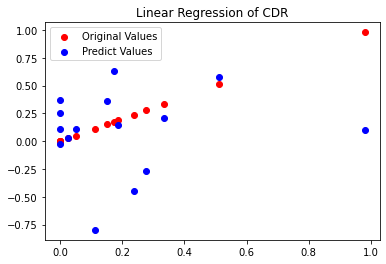

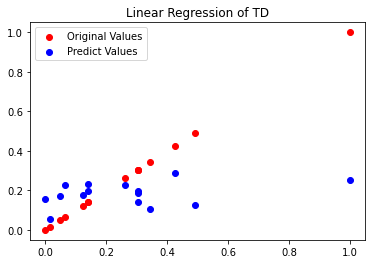

In [55]:
# Model for Linear Regression to estimate Technical Debt using Internal Metrics and External Metrics.
x_train, x_test, y_train, y_test = train_test_split(x,y_cdr, train_size = 0.70,random_state = random_fixed)
linearRegression(x_train,y_train,x_test,y_test,"cdr")

x_train, x_test, y_train, y_test = train_test_split(x,y_td, train_size = 0.70,random_state = random_fixed)
linearRegression(x_train,y_train,x_test,y_test,"td")

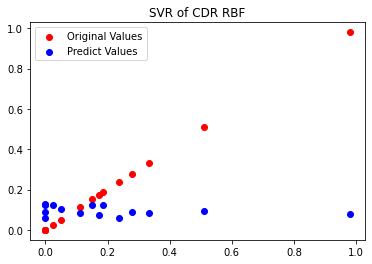

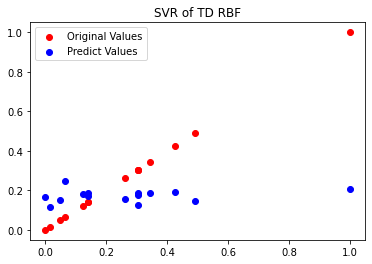

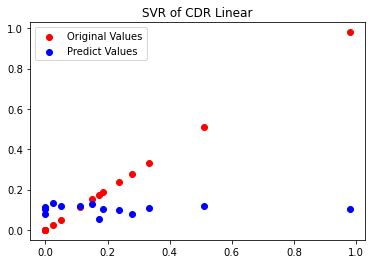

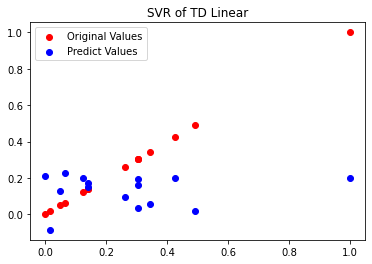

In [56]:
# Model for SVR Regression to estimate Technical Debt using Internal Metrics and External Metrics.
x_train, x_test, y_train, y_test = train_test_split(x,y_cdr, train_size = 0.70,random_state = random_fixed)
svrRegression(x_train,y_train,x_test,y_test,"cdr","RBF")

x_train, x_test, y_train, y_test = train_test_split(x,y_td, train_size = 0.70,random_state = random_fixed)
svrRegression(x_train,y_train,x_test,y_test,"td","RBF")

x_train, x_test, y_train, y_test = train_test_split(x,y_cdr, train_size = 0.70,random_state = random_fixed)
svrRegression(x_train,y_train,x_test,y_test,"cdr","Linear")

x_train, x_test, y_train, y_test = train_test_split(x,y_td, train_size = 0.70,random_state = random_fixed)
svrRegression(x_train,y_train,x_test,y_test,"td","Linear")

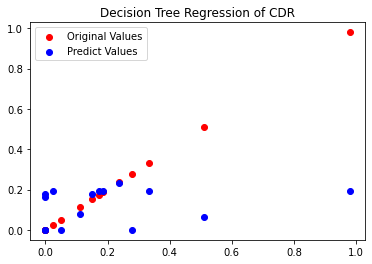

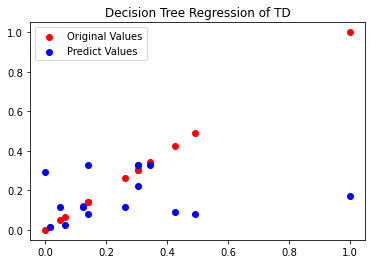

In [57]:
# Model for Decision Tree Regression to estimate Technical Debt using Internal and External Metrics.
x_train, x_test, y_train, y_test = train_test_split(x,y_cdr, train_size = 0.70,random_state = random_fixed)
decisionTreeRegression(x_train,y_train,x_test,y_test,"cdr")
x_train, x_test, y_train, y_test = train_test_split(x,y_td, train_size = 0.70,random_state = random_fixed)
decisionTreeRegression(x_train,y_train,x_test,y_test,"td")

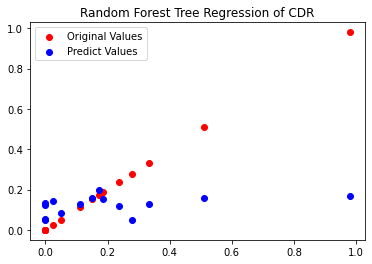

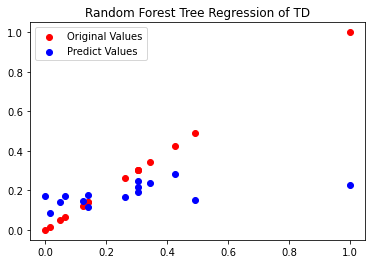

In [58]:
# Model for Random Dec. Tree Regression to estimate Technical Debt using Internal and External Metrics.
x_train, x_test, y_train, y_test = train_test_split(x,y_cdr, train_size = 0.70,random_state = random_fixed)
randomDecTreeRegression(x_train,y_train,x_test,y_test,"cdr")
x_train, x_test, y_train, y_test = train_test_split(x,y_td, train_size = 0.70,random_state = random_fixed)
randomDecTreeRegression(x_train,y_train,x_test,y_test,"td")

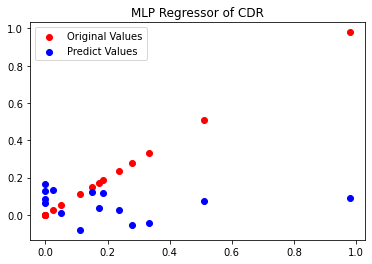

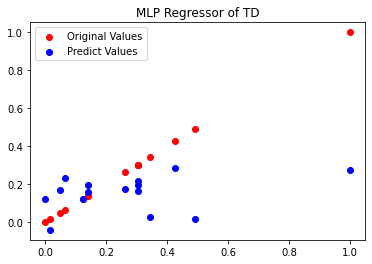

In [59]:
# Model for MLP Regressor to estimate Technical Debt using Internal and External Metrics.
train, x_test, y_train, y_test = train_test_split(x,y_cdr, train_size = 0.70,random_state = random_fixed)
mlpRegressor(x_train,y_train,x_test,y_test,"cdr")
x_train, x_test, y_train, y_test = train_test_split(x,y_td, train_size = 0.70,random_state = random_fixed)
mlpRegressor(x_train,y_train,x_test,y_test,"td")